In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [3]:
train_dir = '/content/drive/MyDrive/try/car/data1a/training'
validation_dir = '/content/drive/MyDrive/try/car/data1a/validation'
test_dir = '/content/drive/MyDrive/try/car/data1a/testing'

In [4]:
# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 1840 images belonging to 2 classes.
Found 85 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [5]:
# Calculate steps per epoch
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = validation_generator.samples // validation_generator.batch_size

In [6]:
# Load the base model Xception
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
base_model.trainable = False

# Add classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    epochs=100,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


57/57 ━━━━━━━━━━━━━━━━━━━━ 405s 6s/step - accuracy: 0.6570 - loss: 20.1198 - val_accuracy: 0.7500 - val_loss: 17.1549 - learning_rate: 1.0000e-04
Epoch 2/100
 1/57 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.8750 - loss: 17.0965

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 257ms/step - accuracy: 0.8750 - loss: 17.0965 - val_accuracy: 0.7619 - val_loss: 17.1399 - learning_rate: 1.0000e-04
Epoch 3/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 61s 511ms/step - accuracy: 0.7889 - loss: 16.3261 - val_accuracy: 0.8594 - val_loss: 13.9116 - learning_rate: 1.0000e-04
Epoch 4/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7188 - loss: 14.1948 - val_accuracy: 0.9048 - val_loss: 13.7881 - learning_rate: 1.0000e-04
Epoch 5/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 32s 502ms/step - accuracy: 0.8254 - loss: 13.2762 - val_accuracy: 0.9375 - val_loss: 11.3097 - learning_rate: 1.0000e-04
Epoch 6/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9062 - loss: 11.3546 - val_accuracy: 1.0000 - val_loss: 11.2795 - learning_rate: 1.0000e-04
Epoch 7/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 34s 535ms/step - accuracy: 0.8505 - loss: 10.8328 - val_accuracy: 0.8906 - val_loss: 9.2793 - learning_rate: 1.0000e-04
Epoch 8/100
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accu

In [9]:
# Évaluer le modèle
loss_train, accuracy_train = model.evaluate(train_generator)
print(f'Train Loss: {loss_train}')
print(f'Train Accuracy: {accuracy_train}')
# Évaluer le modèle
loss_val, accuracy_val = model.evaluate(validation_generator)
print(f'val Loss: {loss_val}')
print(f'val Accuracy: {accuracy_val}')
# Évaluer le modèle
loss_test, accuracy_test = model.evaluate(test_generator)
print(f'Test Loss: {loss_test}')
print(f'Test Accuracy: {accuracy_test}')

58/58 ━━━━━━━━━━━━━━━━━━━━ 41s 705ms/step - accuracy: 0.9209 - loss: 0.3923
Test Loss: 0.40543609857559204
Test Accuracy: 0.914673924446106
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 379ms/step - accuracy: 0.8983 - loss: 0.3891
Test Loss: 0.3864024877548218
Test Accuracy: 0.9058823585510254
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.9000 - loss: 0.4807
Test Loss: 0.4807499051094055
Test Accuracy: 0.8999999761581421


In [11]:
# Prédictions
y_pred = model.predict(test_generator)
y_pred = (y_pred > 0.5).astype(int).flatten()

# Rapport de classification
print(classification_report(test_generator.classes, y_pred, target_names=['non-damaged', 'damaged']))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
              precision    recall  f1-score   support

 non-damaged       0.90      0.90      0.90        10
     damaged       0.90      0.90      0.90        10

    accuracy                           0.90        20
   macro avg       0.90      0.90      0.90        20
weighted avg       0.90      0.90      0.90        20



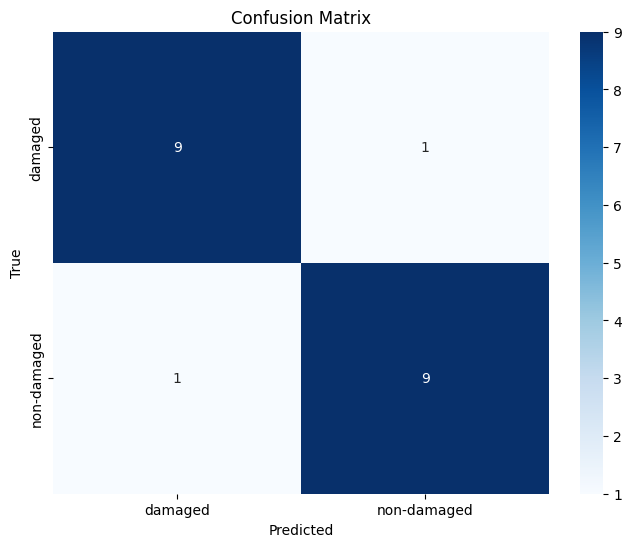

In [12]:
# Visualisation de la matrice de confusion
# Matrice de confusion
cm = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['damaged', 'non-damaged'], yticklabels=['damaged', 'non-damaged'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

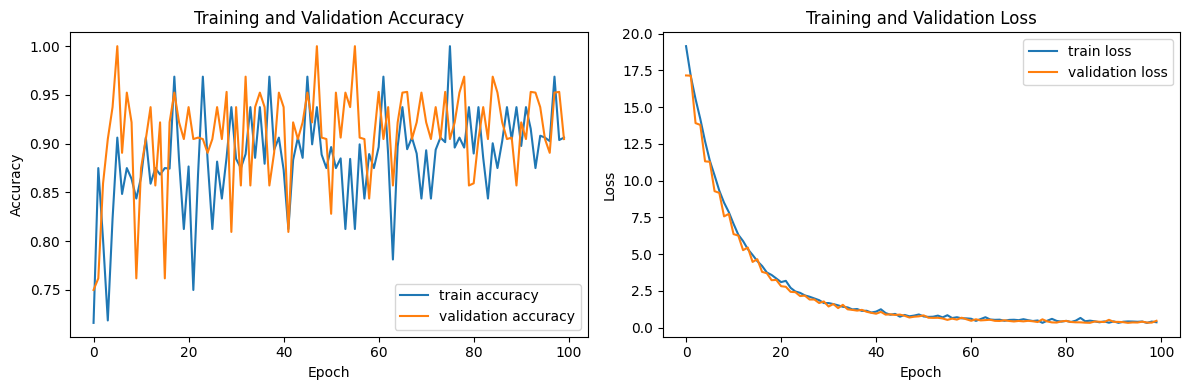

In [13]:


# Graphique des performances d'entraînement
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.tight_layout()
plt.show()

In [14]:
# Affichage des images de test avec leurs étiquettes réelles et les prédictions
class_names = {v: k for k, v in test_generator.class_indices.items()}

fig, axes = plt.subplots(4, 4, figsize=(16, 16))
axes = axes.flatten()
for img, ax, true_label, pred_label in zip(test_generator.filepaths, axes, test_generator.classes, y_pred):
    img = plt.imread(img)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"True: {class_names[true_label]}, Pred: {class_names[pred_label]}")
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [15]:
model.save('/content/drive/MyDrive/try/model_CNN_2.h5')